# Forest cover type prediction 
**BERRIMI Mohamed -- MASTER IDTW **


# Get the dataset from UCI machine learning  
The dataset can be uploaded from : https://archive.ics.uci.edu/ml/datasets/covertype

In [0]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sys
import pandas as pd 
dataset = pd.read_csv('../data.csv')


**Read the dataset **

In [0]:
dataset.head()

2596   51   3  258    0   510  221  232  148  6279 ...  0.34  0.35  0.36  \
0  2590   56   2  212   -6   390  220  235  151  6225 ...     0     0     0   
1  2804  139   9  268   65  3180  234  238  135  6121 ...     0     0     0   
2  2785  155  18  242  118  3090  238  238  122  6211 ...     0     0     0   
3  2595   45   2  153   -1   391  220  234  150  6172 ...     0     0     0   
4  2579  132   6  300  -15    67  230  237  140  6031 ...     0     0     0   

   0.37  0.38  0.39  0.40  0.41  0.42  5  
0     0     0     0     0     0     0  5  
1     0     0     0     0     0     0  2  
2     0     0     0     0     0     0  2  
3     0     0     0     0     0     0  5  
4     0     0     0     0     0     0  2  

[5 rows x 55 columns]

**The column's dataset are missed , we need to manually add them **

In [0]:
dataset.columns = ['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6',
 'Soil_Type7',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type14',
 'Soil_Type15',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type29',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40',
 'Cover_Type']

In [0]:
dataset.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2590      56      2                               212   
1       2804     139      9                               268   
2       2785     155     18                               242   
3       2595      45      2                               153   
4       2579     132      6                               300   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                              -6                              390   
1                              65                             3180   
2                             118                             3090   
3                              -1                              391   
4                             -15                               67   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            220             235            151   
1            234             238            135   
2            238             238            122   
3            220             234            150   
4            230             237            140   

   Horizontal_Distance_To_Fire_Points     ...      Soil_Type32  Soil_Type33  \
0                                6225     ...                0            0   
1                                6121     ...                0            0   
2                                6211     ...                0            0   
3                                6172     ...                0            0   
4                                6031     ...                0            0   

   Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type39  Soil_Type40  Cover_Type  
0            0            0           5  
1            0            0           2  
2            0            0           2  
3            0            0           5  
4            0            0           2  

[5 rows x 55 columns]

In [0]:
# take a look on the dataset 
print(dataset.shape)



(581011, 55)


In [0]:
dataset.isnull().values.any()


False

In [0]:
import warnings
warnings.filterwarnings('ignore')


In [0]:
for c in dataset.columns:
            if dataset[c].std() == 0:
                rem.append(c)
                print(rem)
          
            else:
              print('No variable has Sdev == 0 ')

In [0]:
dataset.groupby('Cover_Type').size()


Cover_Type
1    211840
2    283301
3     35754
4      2747
5      9492
6     17367
7     20510
dtype: int64

In [0]:
dataset.describe()

Elevation         Aspect          Slope  \
count  581011.000000  581011.000000  581011.000000   
mean     2959.365926     155.656988      14.103723   
std       279.984569     111.913733       7.488234   
min      1859.000000       0.000000       0.000000   
25%      2809.000000      58.000000       9.000000   
50%      2996.000000     127.000000      13.000000   
75%      3163.000000     260.000000      18.000000   
max      3858.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     581011.000000                   581011.000000   
mean                         269.428236                       46.418935   
std                          212.549538                       58.295250   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                          218.000000                       30.000000   
75%                          384.000000                       69.000000   
max                         1397.000000                      601.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                    581011.000000  581011.000000   581011.000000   
mean                       2350.149779     212.146033      223.318701   
std                        1559.254343      26.769909       19.768711   
min                           0.000000       0.000000        0.000000   
25%                        1106.000000     198.000000      213.000000   
50%                        1997.000000     218.000000      226.000000   
75%                        3328.000000     231.000000      237.000000   
max                        7117.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points      ...        \
count  581011.000000                       581011.000000      ...         
mean      142.528253                         1980.283828      ...         
std        38.274561                         1324.184340      ...         
min         0.000000                            0.000000      ...         
25%       119.000000                         1024.000000      ...         
50%       143.000000                         1710.000000      ...         
75%       168.000000                         2550.000000      ...         
max       254.000000                         7173.000000      ...         

         Soil_Type32    Soil_Type33    Soil_Type34    Soil_Type35  \
count  581011.000000  581011.000000  581011.000000  581011.000000   
mean        0.090392       0.077716       0.002773       0.003255   
std         0.286743       0.267725       0.052584       0.056957   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

         Soil_Type36    Soil_Type37    Soil_Type38    Soil_Type39  \
count  581011.000000  581011.000000  581011.000000  581011.000000   
mean        0.000205       0.000513       0.026803       0.023762   
std         0.014310       0.022641       0.161508       0.152307   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

         Soil_Type40     Cover_Type  
count  581011.000000  581011.000000  
mean        0.015060       2.051465  
std         0.121792       1.396500  
min         0.000000       1.000000  
25%         0.000000       1.000000  
50%         0.000000       2.000000  
75% 

**Print the important correlations between variables , ( > 0.5 )**

In [0]:
#sets the number of features considered
size = 10 

#create a dataframe with only 'size' features
data=dataset.iloc[:,:size] 

#get the names of all the columns
cols=data.columns 

# Calculates pearson co-efficient for all combinations
data_corr = data.corr()

# Set the threshold to select only only highly correlated attributes
threshold = 0.5

# List of pairs along with correlation above threshold
corr_list = []

#Search for the highly correlated pairs
for i in range(0,size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

# Strong correlation is observed between the following pairs
# This represents an opportunity to reduce the feature set through transformations such as PCA

Hillshade_9am and Hillshade_3pm = -0.78
Aspect and Hillshade_3pm = 0.65
Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology = 0.61
Hillshade_Noon and Hillshade_3pm = 0.59
Aspect and Hillshade_9am = -0.58
Slope and Hillshade_Noon = -0.53


# DATA VISUALIZATION 

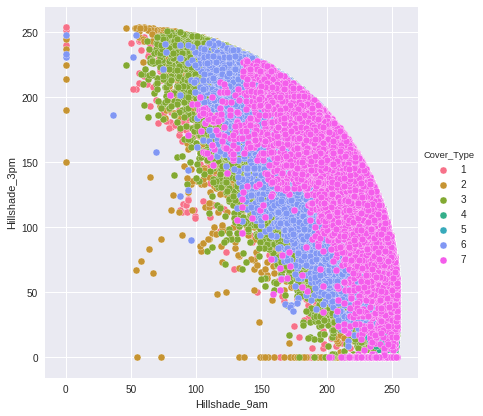

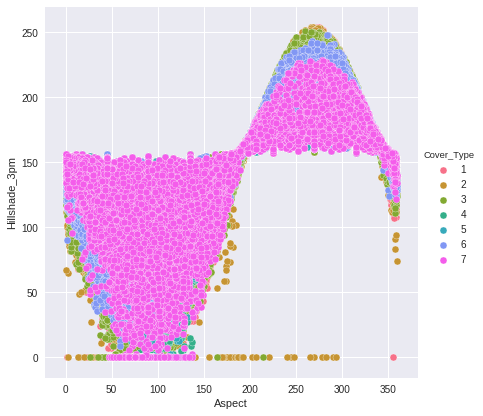

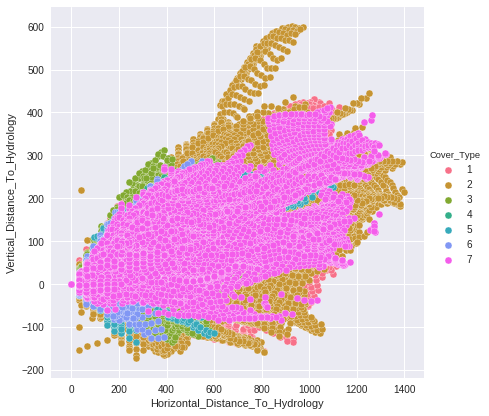

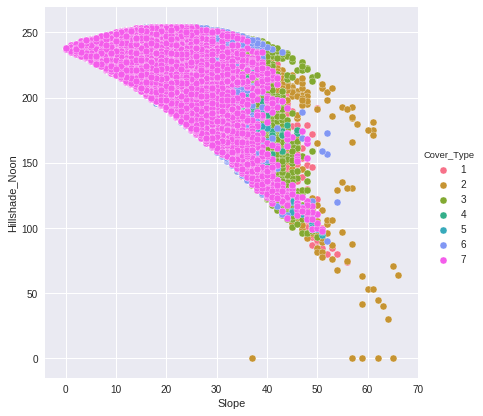

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of only the highly correlated pairs
for v,i,j in s_corr_list:
    sns.pairplot(dataset, hue="Cover_Type", size=6, x_vars=cols[i],y_vars=cols[j] )
    plt.show()


# Pre-Processing 
**The X contains the independent variables and the Y is the class (dependent variable ) that we aim to predict **

In [0]:
X = dataset.iloc[:,0:54].values
y = dataset.iloc[:, 54:55].values

**Split the dataset into train and test sets **

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



In [0]:
X_train.shape

(464808, 54)

# **Feature Scaling**
Scale the dataset in order to have a normalized data 

In [0]:
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[[-0.71461342 -0.75538278 -0.01330454 ... -0.16543966 -0.15522532
  -0.12366273]
 [-1.043103   -0.61240453  0.25365815 ... -0.16543966 -0.15522532
  -0.12366273]
 [-2.13925844 -0.80899963 -0.94767395 ... -0.16543966 -0.15522532
  -0.12366273]
 ...
 [-0.1076218   0.98716463 -0.41374857 ... -0.16543966 -0.15522532
  -0.12366273]
 [ 0.65647352 -1.21112595 -1.0811553  ... -0.16543966 -0.15522532
  -0.12366273]
 [ 0.76001915 -0.21921435  0.1201768  ... -0.16543966 -0.15522532
  -0.12366273]]


# Applying the Algorithms

# PCA 

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_trainPCA = pca.fit_transform(X_train)
X_testPCA = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_


In [0]:
print(explained_variance)

[0.06858276 0.05409399]


In [0]:
 print(pca.singular_values_)  

[1312.02208385 1165.22065609]


# SVM

In [0]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [0]:
print("SVM Accuracy :", accuracy_score(y_test, y_pred))


# Logistic regression classifier 

In [0]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(X_train)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)



[[-1.83933317 -1.3541042   0.1201768  ... -0.0229647  -0.16543966
  -0.15522532]
 [ 1.41342777 -0.53197927  1.18802756 ... -0.0229647  -0.16543966
  -0.15522532]
 [ 0.10303999  1.02290919 -1.74856202 ... -0.0229647  -0.16543966
  -0.15522532]
 ...
 [-1.43943281 -0.32644803  0.1201768  ... -0.0229647  -0.16543966
  -0.15522532]
 [ 1.3241643   0.70120813  0.25365815 ... -0.0229647  -0.16543966
  -0.15522532]
 [-1.65366515  0.87993094  1.58847159 ... -0.0229647  -0.16543966
  -0.15522532]]


0.7166682443654638

**The Logistic Regression gave us the accuracy of 72.66 % **
**Running time : 8 minutes **

# **One Vs ALL using SVM **

In [0]:
from sklearn.metrics import accuracy_score, classification_report

from sklearn.svm import LinearSVC
LSVC = LinearSVC()

LSVC.fit(X_train,y_train)
y2_LSVC_model = LSVC.predict(X_test)
print("LSVC Accuracy :", accuracy_score(y_test, y2_LSVC_model))




LSVC Accuracy : 0.6436150529676514


**One Vs ALL SVM gave us the accuracy of 64.3 % !! **
**Execution time : 47 minutes **

In [0]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

classifierSVM  = SVC(kernel = 'rbf', random_state = 0)



In [0]:
classifierSVM.fit(X_train, y_train)


In [0]:
# Predicting the Test set results
y_pred = classifierSVM.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("SVM  Accuracy :", accuracy_score(y_test, y_pred))




# XGBOOST

In [0]:
from xgboost import XGBClassifier
XGclassifier = XGBClassifier()



In [0]:
XGclassifier.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [0]:
# Predicting the Test set results
y_pred = XGclassifier.predict(X_test)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [0]:

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


In [0]:

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = modelXG, X = X_train, y = y_train, cv = 3)
accuracies.mean()
accuracies.std()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# XGBOOST 

In [0]:
from sklearn.metrics import accuracy_score, classification_report

accXG=XGclassifier.score(X_test,y_test)
print('The accuracy of XGBOOST classifier is : ',accXG)


In [0]:
modelXG = XGBClassifier()
modelXG.fit(X_train, y_train)
# make predic tions for test data
y_pred = modelXG.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracyXG = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracyXG * 100.0))

Accuracy: 74.56%


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


**XGBOOST Accuracy : 74.56%**
**Execution time : 21 minutes  **

Random Forest is a supervised learning algorithm , it creates a forest and makes it somehow random. The „forest“ it builds, is an ensemble of Decision Trees, most of the time trained with the “bagging” method.it bases on the concept of that we can make a strong  classifier based on ensemble of weak classifiers.


# Random Forest classifier 

In [0]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=300,class_weight='balanced',n_jobs=2,random_state=42)



In [0]:
rf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=2, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [0]:
pred=rf.predict(X_test)


In [0]:
acc=rf.score(X_test,y_test)
print('The accuracy of Random Forest classifier is : ',acc)



The accuracy of Random Forest classifier is :  0.9571439635809746


**Random Forest classifier : 95.7 % **
**Running Time : 18  minutes **

In [0]:
# See the importance of features
importances = rf_model.feature_importances_
indices = np.argsort(importances)

fig = plt.figure()
fig.set_size_inches(20, 20)
sns.set(font_scale=1.5)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features.keys()[indices])
plt.xlabel('Relative Importance')


In [0]:
X_train.shape

(464808, 54)

# Deep learning 

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical




Using TensorFlow backend.


In [0]:
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
Y = to_categorical(y_train)

modelNN = Sequential()
modelNN.add(Dense(200,input_dim=54,activation='relu'))
modelNN.add(Dense(150,activation='relu'))
modelNN.add(Dropout(0.2))
modelNN.add(Dense(8,activation='softmax'))
modelNN.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
modelNN.fit(X_train,Y ,epochs=20,batch_size=10)

Epoch 1/20
464808/464808 [==============================] - 65s 140us/step - loss: 0.5091 - acc: 0.7829
Epoch 2/20
464808/464808 [==============================] - 65s 141us/step - loss: 0.4081 - acc: 0.8288
Epoch 3/20
464808/464808 [==============================] - 64s 138us/step - loss: 0.3797 - acc: 0.8441
Epoch 4/20
464808/464808 [==============================] - 65s 139us/step - loss: 0.3631 - acc: 0.8516
Epoch 5/20
464808/464808 [==============================] - 64s 139us/step - loss: 0.3544 - acc: 0.8582
Epoch 6/20
464808/464808 [==============================] - 64s 137us/step - loss: 0.3627 - acc: 0.8604
Epoch 7/20
464808/464808 [==============================] - 65s 140us/step - loss: 0.3593 - acc: 0.8630
Epoch 8/20
464808/464808 [==============================] - 64s 138us/step - loss: 0.3588 - acc: 0.8652
Epoch 9/20
464808/464808 [==============================] - 64s 138us/step - loss: 0.3543 - acc: 0.8662
Epoch 10/20
464808/464808 [==============================] - 64s

In [0]:
# evaluate the model
scores = modelNN.evaluate(X_train, Y)
print("\n%s: %.2f%%" % (modelNN.metrics_names[1], scores[1]*100))

464808/464808 [==============================] - 10s 21us/step

acc: 88.61%
